# CelebA

In [0]:
!unzip /content/CelebA_dataset_2.zip

Archive:  /content/CelebA_dataset_2.zip
   creating: CelebA_dataset/
   creating: CelebA_dataset/Fake/
  inflating: CelebA_dataset/Fake/0.jpg  
  inflating: CelebA_dataset/Fake/1.jpg  
  inflating: CelebA_dataset/Fake/2.jpg  
  inflating: CelebA_dataset/Fake/3.jpg  
  inflating: CelebA_dataset/Fake/4.jpg  
  inflating: CelebA_dataset/Fake/5.jpg  
  inflating: CelebA_dataset/Fake/6.jpg  
  inflating: CelebA_dataset/Fake/7.jpg  
  inflating: CelebA_dataset/Fake/8.jpg  
  inflating: CelebA_dataset/Fake/9.jpg  
  inflating: CelebA_dataset/Fake/10.jpg  
  inflating: CelebA_dataset/Fake/11.jpg  
  inflating: CelebA_dataset/Fake/12.jpg  
  inflating: CelebA_dataset/Fake/13.jpg  
  inflating: CelebA_dataset/Fake/14.jpg  
  inflating: CelebA_dataset/Fake/15.jpg  
  inflating: CelebA_dataset/Fake/16.jpg  
  inflating: CelebA_dataset/Fake/17.jpg  
  inflating: CelebA_dataset/Fake/18.jpg  
  inflating: CelebA_dataset/Fake/19.jpg  
  inflating: CelebA_dataset/Fake/20.jpg  
   creating: CelebA_datas

### 1. Create feature

If you want to create the features, first of all unzip file "dataset_celebA.7z ". Be sure to save the folder together with this notebook. You also need to download  [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).

Otherwise, just jump to section 2.

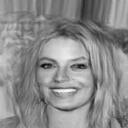

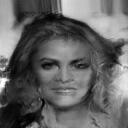

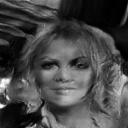

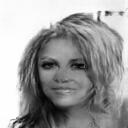

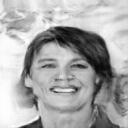

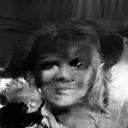

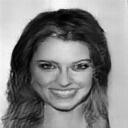

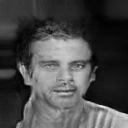

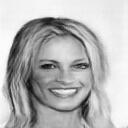

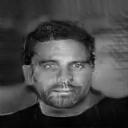

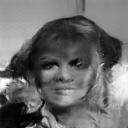

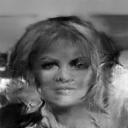

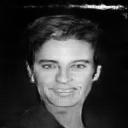

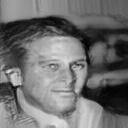

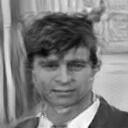

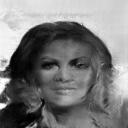

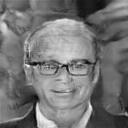

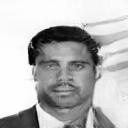

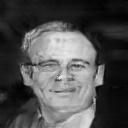

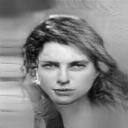

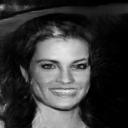

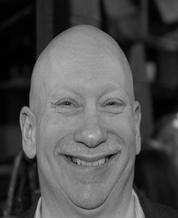

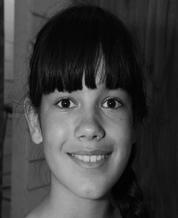

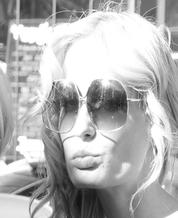

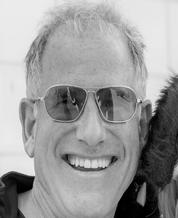

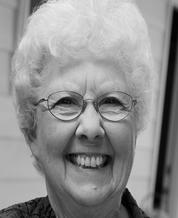

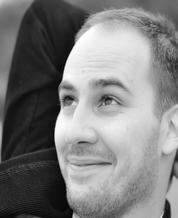

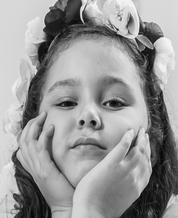

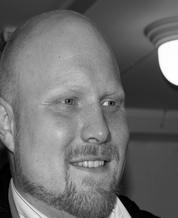

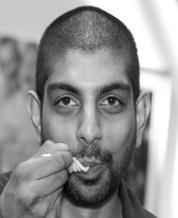

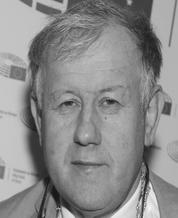

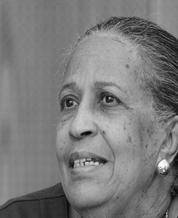

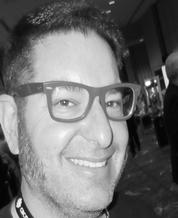

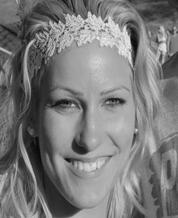

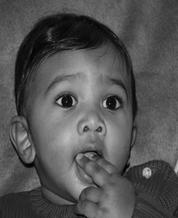

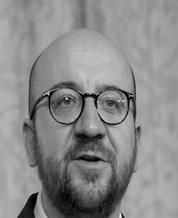

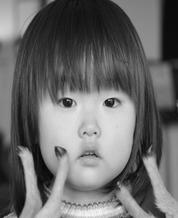

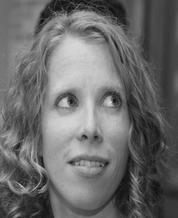

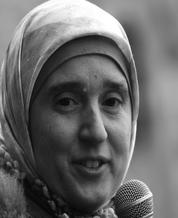

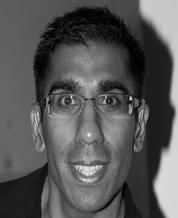

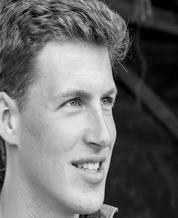

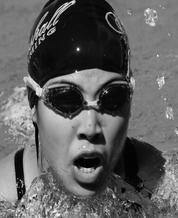

{'data': array([[1.        , 0.95061566, 0.91594629, ..., 0.36679018, 0.36595654,
        0.40389159],
       [1.        , 0.93686184, 0.88825919, ..., 0.37489941, 0.37298983,
        0.3406398 ],
       [1.        , 0.94778038, 0.90113386, ..., 0.41906678, 0.41928233,
        0.44233055],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), 'label': array([1., 1., 1., ..., 0., 0., 0.])}
DATA Saved


In [0]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from scipy.interpolate import griddata
from google.colab.patches import cv2_imshow

data= {}
epsilon = 1e-8
N = 80
y = []
error = []

number_iter = 1000

psd1D_total = np.zeros([number_iter, N])
label_total = np.zeros([number_iter])
psd1D_org_mean = np.zeros(N)
psd1D_org_std = np.zeros(N)

cont = 0

#fake data
rootdir = "/content/CelebA_dataset/Fake/"

for filename in glob.glob(rootdir+"*.jpg"):
    img = cv2.imread(filename,0)
    cv2_imshow(img)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon
    
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

    # Calculate the azimuthally averaged 1D power spectrum
    points = np.linspace(0,N,num=psd1D.size) # coordinates of a
    xi = np.linspace(0,N,num=N) # coordinates for interpolation

    interpolated = griddata(points,psd1D,xi,method='cubic')
    interpolated /= interpolated[0]

    psd1D_total[cont,:] = interpolated             
    label_total[cont] = 1
    cont+=1

    if cont == number_iter:
        break

for x in range(N):
    psd1D_org_mean[x] = np.mean(psd1D_total[:,x])
    psd1D_org_std[x]= np.std(psd1D_total[:,x])
    

## real data
psd1D_total2 = np.zeros([number_iter, N])
label_total2 = np.zeros([number_iter])
psd1D_org_mean2 = np.zeros(N)
psd1D_org_std2 = np.zeros(N)

cont = 0
rootdir2 = "/content/CelebA_dataset/Real/"


for filename in glob.glob(rootdir2+"*.jpg"):     
    img = cv2.imread(filename,0)
    cv2_imshow(img)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift += epsilon

    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)

    points = np.linspace(0,N,num=psd1D.size) # coordinates of a
    xi = np.linspace(0,N,num=N) # coordinates for interpolation

    interpolated = griddata(points,psd1D,xi,method='cubic')

    interpolated /= interpolated[0]

    psd1D_total2[cont,:] = interpolated             
    label_total2[cont] = 0
    cont+=1
    
    if cont == number_iter:
        break

for x in range(N):
    psd1D_org_mean2[x] = np.mean(psd1D_total2[:,x])
    psd1D_org_std2[x]= np.std(psd1D_total2[:,x])
    
y.append(psd1D_org_mean)
y.append(psd1D_org_mean2)
error.append(psd1D_org_std)
error.append(psd1D_org_std2)

psd1D_total_final = np.concatenate((psd1D_total,psd1D_total2), axis=0)
label_total_final = np.concatenate((label_total,label_total2), axis=0)

data["data"] = psd1D_total_final
data["label"] = label_total_final
print(data)
output = open('g27.pkl', 'wb')
pickle.dump(data, output)
output.close()

print("DATA Saved") 

### 2. Loading Features

Now, we load the features. Either the pre-computed ones or the features that you have created.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file = open('g27.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]
print(X)
print(y)

[[1.         0.95061566 0.91594629 ... 0.36679018 0.36595654 0.40389159]
 [1.         0.93686184 0.88825919 ... 0.37489941 0.37298983 0.3406398 ]
 [1.         0.94778038 0.90113386 ... 0.41906678 0.41928233 0.44233055]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[1. 1. 1. ... 0. 0. 0.]


We look at the label distribution, to be sure that we have a balanced dataset.

(0.0, 40.0)

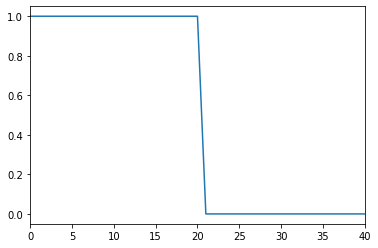

In [0]:
plt.plot(y)
plt.xlim(0, 40)

### 4. Classification

Now we classify using the features.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

num = 10
LR = 0
SVM = 0
SVM_r = 0
SVM_p = 0
KNN = 0
RFC = 0

for z in range(num):
    # read python dict back from the file
    pkl_file = open('g27.pkl', 'rb')
    
    data = pickle.load(pkl_file)

    pkl_file.close()
    X = data["data"]
    y = data["label"]

    try:

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='linear')
        svclassifier.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
               
        from sklearn.neighbors import KNeighborsClassifier
        neigh = KNeighborsClassifier(n_neighbors=2)
        neigh.fit(X_train, y_train)

        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        clf.fit(X_train, y_train)

        from sklearn.svm import SVC
        svclassifier_r = SVC(C=6.37, kernel='rbf', gamma=0.86)
        svclassifier_r.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier_r.score(X_test, y_test)))
                
        from sklearn.svm import SVC
        svclassifier_p = SVC(kernel='poly')
        svclassifier_p.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier_p.score(X_test, y_test)))
        
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=1000)
        logreg.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

        SVM+=svclassifier.score(X_test, y_test)
        SVM_r+=svclassifier_r.score(X_test, y_test)
        SVM_p+=svclassifier_p.score(X_test, y_test)
        LR+=logreg.score(X_test, y_test)
        KNN+=neigh.score(X_test,y_test)
        RFC+=clf.score(X_test,y_test)
    except:
        num-=1
        print(num)
    
print("Average SVM: "+str(SVM/num))
print("Average SVM_r: "+str(SVM_r/num))
print("Average SVM_p: "+str(SVM_p/num))
print("Average LR: "+str(LR/num))
print("Average KNN "+str(KNN/num))
print("Average Random Forest Classifier "+str(RFC/num))

Average SVM: 0.9897499999999999
Average SVM_r: 0.9970000000000001
Average SVM_p: 0.998
Average LR: 0.9914999999999999
Average KNN 0.9964999999999999
Average Random Forest Classifier 0.9950000000000001
